## Coursera Capstone 

_This is part of IBM Data Science Specialization Course_

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


## 1. Importing Data

In [4]:
import pandas as pd
import numpy as np
df = pd.read_csv('/Users/olajide/Desktop/Data-Collisions.csv')
df.head()

/Users/olajide/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [5]:
df.shape

(194673, 38)

In [6]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [7]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [8]:
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [9]:
df['WEATHER'].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [10]:
df['ROADCOND'].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [11]:
df['LIGHTCOND'].value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

## 2. Data Cleaning and Preparation

In [12]:
# Drop all columns with no predictive value for the context of this project
softdata = df.drop(columns = ['OBJECTID', 'SEVERITYCODE.1', 'REPORTNO', 'INCKEY', 'COLDETKEY', 
              'X', 'Y', 'STATUS','ADDRTYPE',
              'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
              'EXCEPTRSNDESC', 'SEVERITYDESC', 'INCDATE',
              'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE',
              'SDOT_COLDESC', 'PEDROWNOTGRNT', 'SDOTCOLNUM',
              'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY',
              'CROSSWALKKEY', 'HITPARKEDCAR', 'PEDCOUNT', 'PEDCYLCOUNT',
              'PERSONCOUNT', 'VEHCOUNT', 'COLLISIONTYPE',
              'SPEEDING', 'UNDERINFL', 'INATTENTIONIND'])
softdata.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
0,2,Overcast,Wet,Daylight
1,1,Raining,Wet,Dark - Street Lights On
2,1,Overcast,Dry,Daylight
3,1,Clear,Dry,Daylight
4,2,Raining,Wet,Daylight


In [13]:
# Converting column to category
softdata["WEATHER"] = softdata["WEATHER"].astype('category')
softdata["ROADCOND"] = softdata["ROADCOND"].astype('category')
softdata["LIGHTCOND"] = softdata["LIGHTCOND"].astype('category')

In [14]:
# Creating new column for the purpopse of analysis

softdata['WEATHER_CAT'] = softdata['WEATHER'].cat.codes
softdata['ROADCOND_CAT'] = softdata['ROADCOND'].cat.codes
softdata['LIGHTCOND_CAT'] = softdata['LIGHTCOND'].cat.codes

softdata.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,WEATHER_CAT,ROADCOND_CAT,LIGHTCOND_CAT
0,2,Overcast,Wet,Daylight,4,8,5
1,1,Raining,Wet,Dark - Street Lights On,6,8,2
2,1,Overcast,Dry,Daylight,4,0,5
3,1,Clear,Dry,Daylight,1,0,5
4,2,Raining,Wet,Daylight,6,8,5


In [15]:
softdata.dtypes

SEVERITYCODE        int64
WEATHER          category
ROADCOND         category
LIGHTCOND        category
WEATHER_CAT          int8
ROADCOND_CAT         int8
LIGHTCOND_CAT        int8
dtype: object

In [16]:
# Check for any missing-data(null) from data-set to be used for analysis
# 'SEVERITYCODE', 'WEATHER_CAT', 'ROADCOND_CAT' and 'LIGHTCOND_CAT'

missing_data = softdata.isnull()
missing_data

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,WEATHER_CAT,ROADCOND_CAT,LIGHTCOND_CAT
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
194668,False,False,False,False,False,False,False
194669,False,False,False,False,False,False,False
194670,False,False,False,False,False,False,False
194671,False,False,False,False,False,False,False


In [17]:
ws = softdata[['SEVERITYCODE', 'WEATHER']]
ws.head(10)

,SEVERITYCODE,WEATHER
0,2,Overcast
1,1,Raining
2,1,Overcast
3,1,Clear
4,2,Raining
5,1,Clear
6,1,Raining
7,2,Clear
8,1,Clear
9,2,Clear


In [18]:
rs = softdata[['SEVERITYCODE', 'ROADCOND']]
rs.head(10)

,SEVERITYCODE,ROADCOND
0,2,Wet
1,1,Wet
2,1,Dry
3,1,Dry
4,2,Wet
5,1,Dry
6,1,Wet
7,2,Dry
8,1,Dry
9,2,Dry


In [19]:
ls = softdata[['SEVERITYCODE', 'LIGHTCOND']]
ls.head(10)

,SEVERITYCODE,LIGHTCOND
0,2,Daylight
1,1,Dark - Street Lights On
2,1,Daylight
3,1,Daylight
4,2,Daylight
5,1,Daylight
6,1,Daylight
7,2,Daylight
8,1,Daylight
9,2,Daylight


In [20]:
wrs = softdata[['SEVERITYCODE', 'WEATHER', 'ROADCOND']]
wrs.head(10)

,SEVERITYCODE,WEATHER,ROADCOND
0,2,Overcast,Wet
1,1,Raining,Wet
2,1,Overcast,Dry
3,1,Clear,Dry
4,2,Raining,Wet
5,1,Clear,Dry
6,1,Raining,Wet
7,2,Clear,Dry
8,1,Clear,Dry
9,2,Clear,Dry


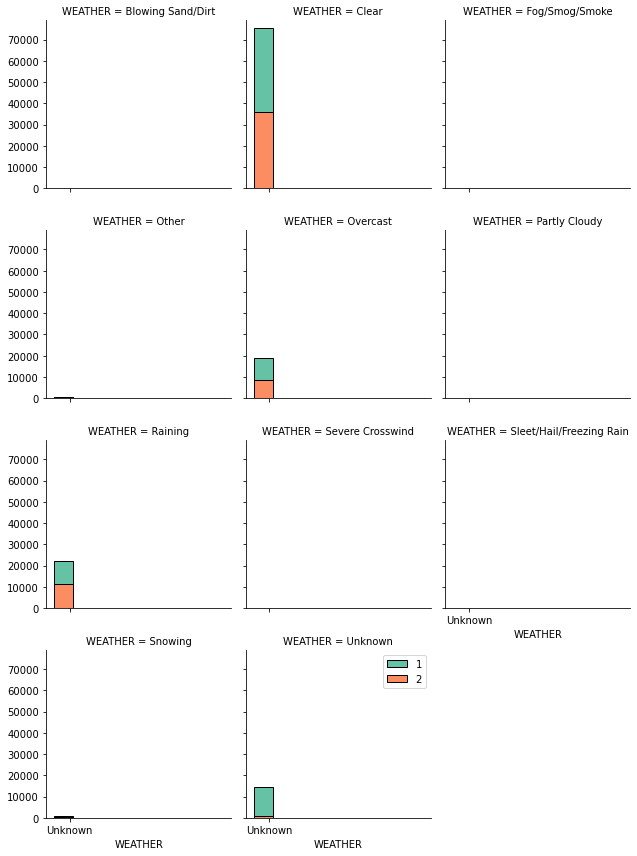

In [21]:
# Checking to see contribution of different conditions to the severity
# Weather

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

bins = np.linspace(softdata.WEATHER_CAT.min(), softdata.WEATHER_CAT.max(),10)
g = sns.FacetGrid(softdata, col="WEATHER",hue="SEVERITYCODE", palette="Set2", col_wrap=3)
g.map(plt.hist, 'WEATHER', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

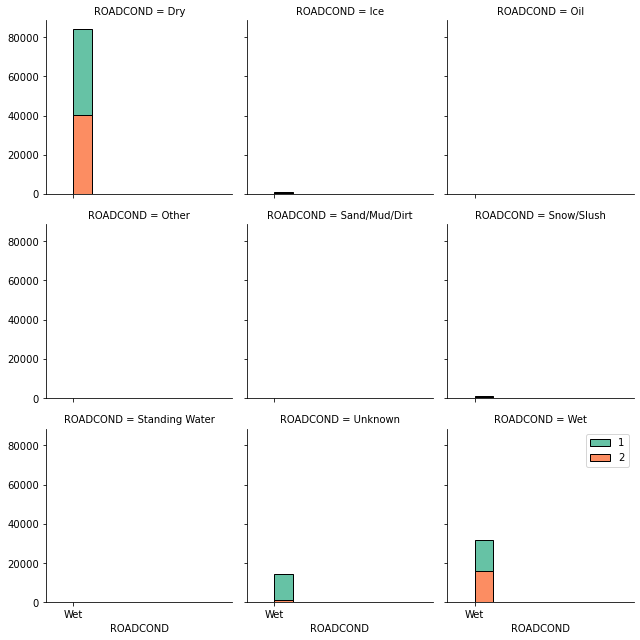

In [22]:
# For Road Condition

bins = np.linspace(softdata.ROADCOND_CAT.min(), softdata.ROADCOND_CAT.max(),10)
g = sns.FacetGrid(softdata, col="ROADCOND", hue="SEVERITYCODE", palette="Set2", col_wrap=3)
g.map(plt.hist, 'ROADCOND', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

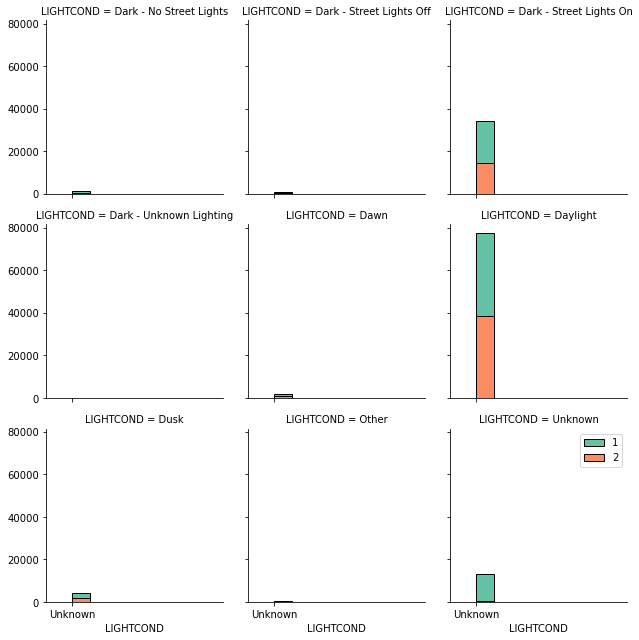

In [23]:
#For Lighting Condition

bins = np.linspace(softdata.LIGHTCOND_CAT.min(), softdata.LIGHTCOND_CAT.max(),10)
g = sns.FacetGrid(softdata, col="LIGHTCOND", hue="SEVERITYCODE", palette="Set2", col_wrap=3)
g.map(plt.hist, 'LIGHTCOND', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

In [24]:
# Data normalization

from sklearn import preprocessing

X = softdata[['WEATHER_CAT', 'ROADCOND_CAT', 'LIGHTCOND_CAT']]
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.35364615,  1.50545441,  0.3912104 ],
       [ 1.04520829,  1.50545441, -1.18714134],
       [ 0.35364615, -0.68713674,  0.3912104 ],
       [-0.68369706, -0.68713674,  0.3912104 ],
       [ 1.04520829,  1.50545441,  0.3912104 ]])

In [25]:
y = softdata['SEVERITYCODE'].values
y[0:5]

array([2, 1, 1, 1, 2])

## 3. Classification Model

In [26]:
# We split X into train and test to find the best k
# Using 30% for Test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

## KNN: K-Nearest Neighbor

In [27]:
# find the best k

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

Ks=22

mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfustionMx=[];
for n in range(1,Ks): 
    kNN_model = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat = kNN_model.predict(X_test)
    mean_acc[n-1]=np.mean(yhat==y_test);
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

In [28]:
knn = pd.DataFrame(columns=['k', 'mean_acc'])
knn['mean_acc'] = mean_acc
knn['k']= np.arange(1, Ks)
knn.set_index('k', inplace = True)
knn.sort_values(by = ['mean_acc'], ascending = False)

,mean_acc
k,
16,0.703366
21,0.703349
20,0.703349
14,0.703349
8,0.703332
12,0.703315
18,0.703281
17,0.703281
13,0.703281


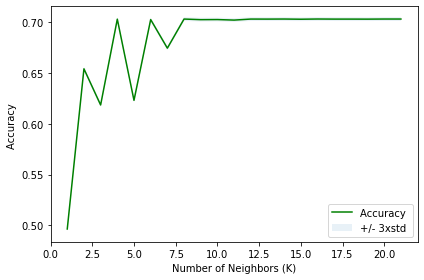

In [29]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [30]:
# k = 14  was lowest among the highest accuracy scores.

softdata_knn = KNeighborsClassifier(n_neighbors = 14).fit(X_train,y_train)

## Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier
softdata_dt = DecisionTreeClassifier(criterion="entropy", max_depth = 7)
softdata_dt.fit(X_train,y_train)

# Train Model & Predict
DT_yhat = softdata_dt.predict(X_test)
print (DT_yhat [0:5])
print (y_test [0:5])

[1 1 1 1 1]
[2 1 1 2 2]


## Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

softdata_lr = LogisticRegression(C=5, solver='liblinear').fit(X_train,y_train)
softdata_lr

LogisticRegression(C=5, solver='liblinear')

In [33]:
# Train Model & Predic
LR_yhat = softdata_lr.predict(X_test)
LR_yhat

array([1, 1, 1, ..., 1, 1, 1])

In [34]:
yhat_prob = softdata_lr.predict_proba(X_test)
yhat_prob

array([[0.72734472, 0.27265528],
       [0.67253944, 0.32746056],
       [0.67265392, 0.32734608],
       ...,
       [0.67499322, 0.32500678],
       [0.79801933, 0.20198067],
       [0.67499322, 0.32500678]])

## 4. Results and Evaluation

In [35]:
import scipy
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [36]:
# Model most accurate when k=14

knn_yhat = softdata_knn.predict(X_test)
print("KNN Jaccard index: %.2f" % jaccard_score(y_test, knn_yhat))
print("KNN F1-score: %.2f" % f1_score(y_test, knn_yhat, average='weighted') )

KNN Jaccard index: 0.70
KNN F1-score: 0.58


In [37]:
# Model most accurate when max-depth = 7

DT_yhat = softdata_dt.predict(X_test)

print("DT Jaccard index: %.2f" % jaccard_score(y_test, DT_yhat))
print("DT F1-score: %.2f" % f1_score(y_test, DT_yhat, average='macro')) 

DT Jaccard index: 0.70
DT F1-score: 0.41


In [38]:
# Model most accurate when C = 6

LR_yhat = softdata_lr.predict(X_test)
yhat_prob = softdata_lr.predict_proba(X_test)
print("LR Jaccard index: %.2f" % jaccard_score(y_test, LR_yhat))
print("LR F1-score: %.2f" % f1_score(y_test, LR_yhat, average='weighted') )
print("LR LogLoss: %.2f" % log_loss(y_test, yhat_prob))

LR Jaccard index: 0.70
LR F1-score: 0.58
LR LogLoss: 0.60


In [39]:
y_test = pd.Series(y_test)
KNN_yhat = pd.Series(knn_yhat)
DT_yhat = pd.Series(DT_yhat)
LR_yhat =pd.Series(LR_yhat)
df_result = pd.concat([y_test, KNN_yhat, DT_yhat, LR_yhat], axis = 1)
df_result.columns = ['y_test', 'KNN_yhat', 'DT_yhat', 'LR_yhat']
df_result.apply(pd.Series.value_counts)

,y_test,KNN_yhat,DT_yhat,LR_yhat
1,41083,58392,58402.0,58402.0
2,17319,10,NaN,NaN
